In [67]:
from pathlib import Path
import math

import torch
import numpy as np
import pandas as pd
import textgrids
import librosa

import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
ROOT_DIR = Path("data/Data")
AUDIOS_DIR = ROOT_DIR / "Audio"
ANNOTATIONS_DIR = ROOT_DIR / "Annotation"

def get_file_paths(name: str):
    audio_path = AUDIOS_DIR / (name + ".wav")
    annotation_path = ANNOTATIONS_DIR / (name + ".TextGrid")

    return audio_path, annotation_path

In [49]:
audio_path, ann_path = get_file_paths("Female/TMIT/SI2220")

In [10]:
grid = textgrids.TextGrid(ann_path)

In [63]:
MS_PER_FRAME = 30

def read_annotation(ann_path):
    grid = textgrids.TextGrid(ann_path)
    labels_per_frame = []
    
    for interval in grid['silences']:
        label = int(interval.text) # 1 = speech, 0 = no speech
        ms = interval.dur * 1000
        num_frames = int(round(ms / MS_PER_FRAME))
        for _ in range(num_frames):
            labels_per_frame.append(label)

    return labels_per_frame

In [69]:
labels_per_frame = read_annotation(ann_path)

In [26]:
def read_audio(audio_path: str):
    signal, freq = librosa.load(audio_path)
    return signal, freq

In [33]:
signal, freq = read_audio(audio_path)

In [61]:
# Total number of samples in the signal
num_samples = len(signal)
# Time elapsed between each sample (ms)
time_period_ms = 1000 * 1 / freq

print(f"{num_samples=}")
print(f"{freq=}")
print(f"{time_period_ms=}")

num_samples=64492
freq=22050
time_period_ms=0.045351473922902494


In [62]:
# stores time in ms of the i'th sample
t = np.arange(num_samples) * time_period_ms

In [68]:
# Number of samples that make a frame
# = MS_PER_FRAME / time_period_ms
# = MS_PER_FRAME / (time_period * 1000)
# = MS_PER_FRAME * 1 / (time_period * 1000)
# = MS_PER_FRAME * freq / 1000 (division by time_period eliminated)
num_frame_samples = int(math.floor(MS_PER_FRAME * freq / 1000))
print(num_frame_samples)

661


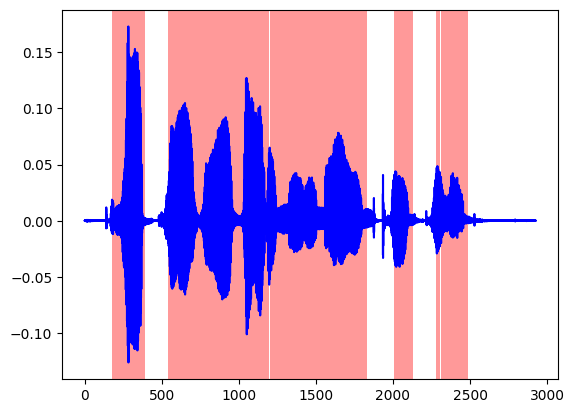

In [77]:
figure = plt.Figure(figsize=(10, 7), dpi=85)
plt.plot(t, signal, c="blue")

for i, frame_labeled in enumerate(labels_per_frame):
    start = i * num_frame_samples
    end = start + num_frame_samples - 1

    if frame_labeled == 1:
        plt.axvspan(
            xmin= t[start], xmax=t[end],
            ymin=-1000, ymax=1000,
            alpha=0.4, zorder=-100,
            facecolor='red', label='Speech'
        )